In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor


# Load_Data

In [133]:
df=pd.read_csv("/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv")

In [134]:
df.sample()

,Date,Open,High,Low,Close,Volume
698,1/8/2018 16:00:00,88.2,88.58,87.6,88.28,22113049


In [135]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [136]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Hour"]=df["Date"].dt.hour
# df["Minutes"]=df.index.minute
df["quarter"]=df["Date"].dt.quarter

In [137]:
df=df.drop("Date",axis=1)

In [138]:
df.sample()

,Open,High,Low,Close,Volume,Year,Month,Day,Hour,quarter
695,86.06,86.51,85.97,86.35,26061439,2018,1,3,16,1


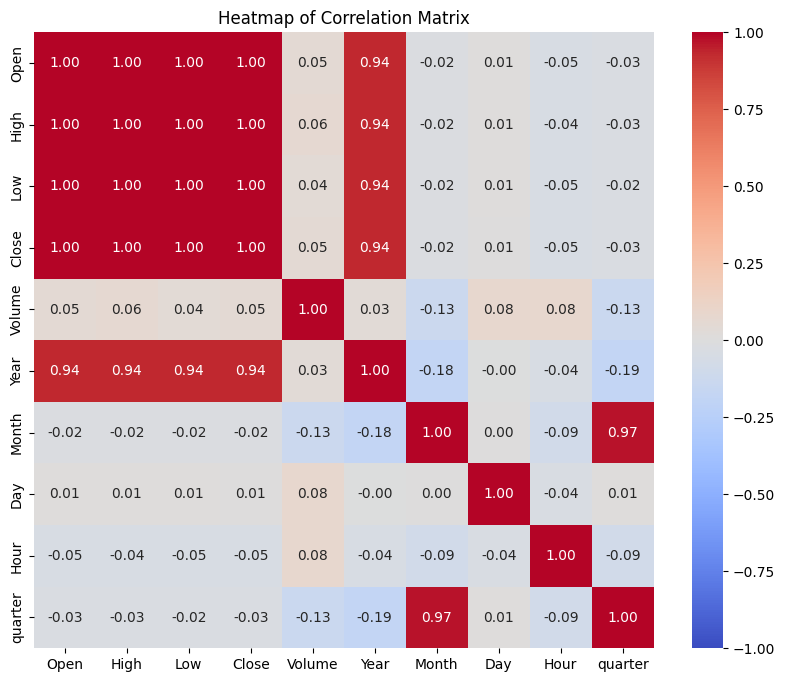

In [139]:
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [140]:
df=df.drop(columns=["Volume","Month","Day","Hour","quarter"],axis=1)

In [141]:
new_corr=df.corr()

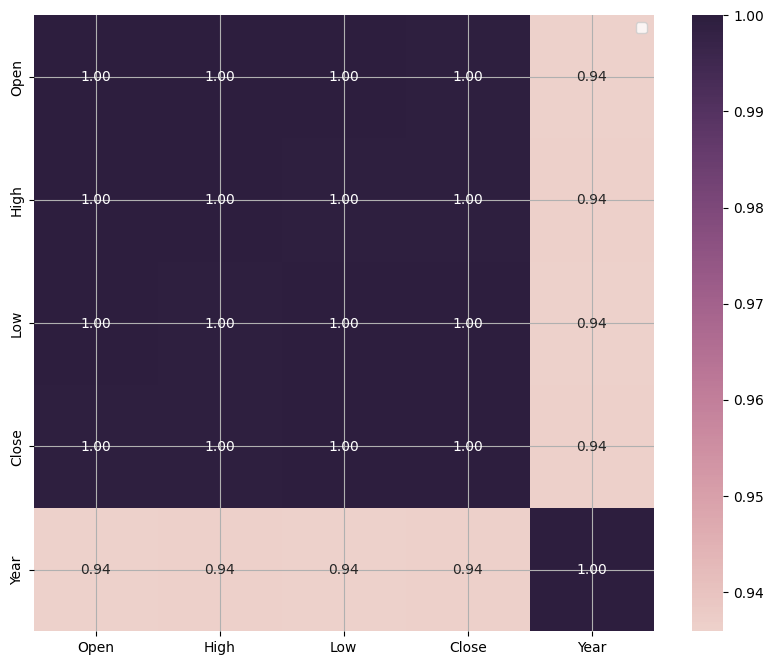

In [142]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.legend()
# plt.plot(new_corr,annot=True)
sns.heatmap(new_corr,annot=True,fmt=".2f",cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [143]:
df.nunique()

Open     1409
High     1400
Low      1397
Close    1398
Year        7
dtype: int64

# augmented data

In [144]:
Op=np.std(df["Open"])
Hi=np.std(df["High"])
Lo=np.std(df["Low"])
Cl=np.std(df["Close"])
Ye=np.std(df["Year"])

In [145]:
aug_data=[]
for _ in range(70):
    for _,row in df.iterrows():
        data={
            "Open":row["Open"] + np.random.uniform(Op),
            "High":row["High"] + np.random.uniform(Hi),
            "Low":row["Low"] + np.random.uniform(Lo),
            "Close":row["Close"] + np.random.uniform(Cl),
            "Year":row["Year"] + np.random.uniform(Ye),
        }
        aug_data.append(data)

In [146]:
df=pd.DataFrame(aug_data)

In [147]:
df.size

528850

In [148]:
df.sample()


,Open,High,Low,Close,Year
38473,104.705919,113.544012,99.340486,134.103484,2019.223482


In [149]:
df.shape

(105770, 5)

# precessed data
# 

In [150]:
X=df.drop(columns=["High","Low"],axis=1)
Y=df[["High","Low"]]

In [151]:
X.sample()

,Open,Close,Year
37232,111.020625,159.749179,2020.628645


In [152]:
Y.sample()

,High,Low
7485,224.501824,268.31876


In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [163]:
X_train.shape

(84616, 3)

In [164]:
Y_train.shape

(84616, 2)

In [156]:
gra=GradientBoostingRegressor()

In [168]:
final_model=MultiOutputRegressor(gra)

In [169]:
final_model.fit(X_train,Y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

# Single Model prediciton

In [171]:
prediction=final_estimator.predict(X_test)
print("for test data:",final_model.score(X_test,Y_test))
print("for train_data:",final_model.score(X_train,Y_train))

for test data: 0.9109550246029309
for train_data: 0.9130066499775819


# Multi model prediction

In [183]:
base_estimator=[
    GradientBoostingRegressor(),
    RandomForestRegressor(random_state=42),
    DecisionTreeRegressor()
]

In [209]:
total_predictions=[]
for mod in base_estimator:
    
    model=MultiOutputRegressor(mod)
    model.fit(X_train,Y_train)
    
    total_predictions.append(model.predict(X_test))
    print("test_score:",model.score(X_test,Y_test))
    print("train_score:",model.score(X_train,Y_train))

test_score: 0.9109552297252221
train_score: 0.9130066499775819
test_score: 0.9031898892306307
train_score: 0.9866689526321646
test_score: 0.8186172252061508
train_score: 1.0


In [ ]:
test_score_ GradientBoostingRegressor: 0.9109552297252221
train_score_GradientBoostingRegressor: 0.9130066499775819
    
test_score_RandomForestRegressor: 0.9031898892306307
train_score_RandomForestRegressor: 0.9866689526321646
    
test_score_DecisionTreeRegressor: 0.8186172252061508
train_score_DecisionTreeRegressor: 1.0

In [193]:
prediction_array=np.array(total_predictions)
prediction_array.shape

(3, 21154, 2)

# total Prediction value

In [ ]:
prediction_array

In [ ]:
np.mean(prediction_array[:,0])